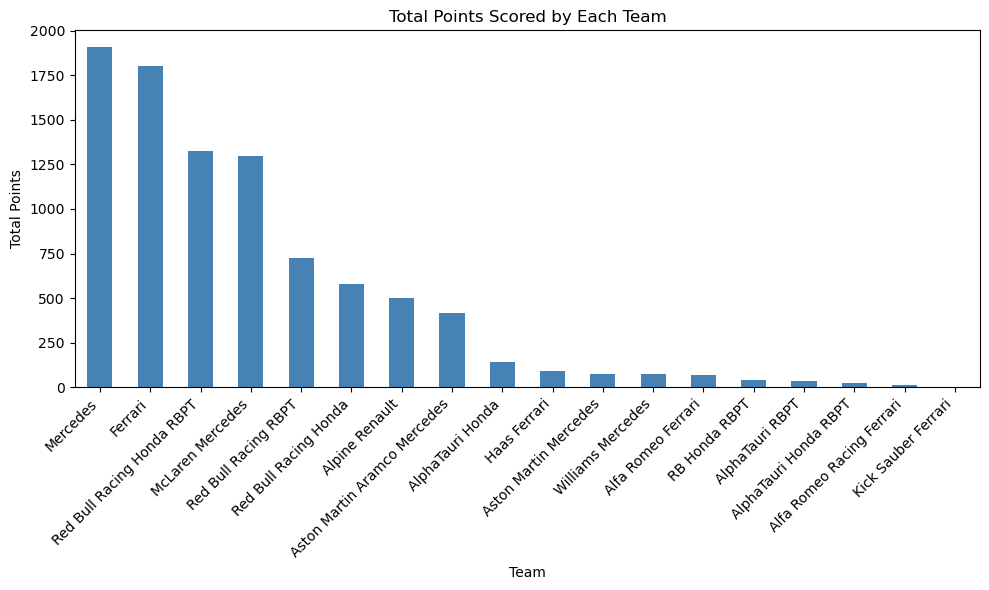

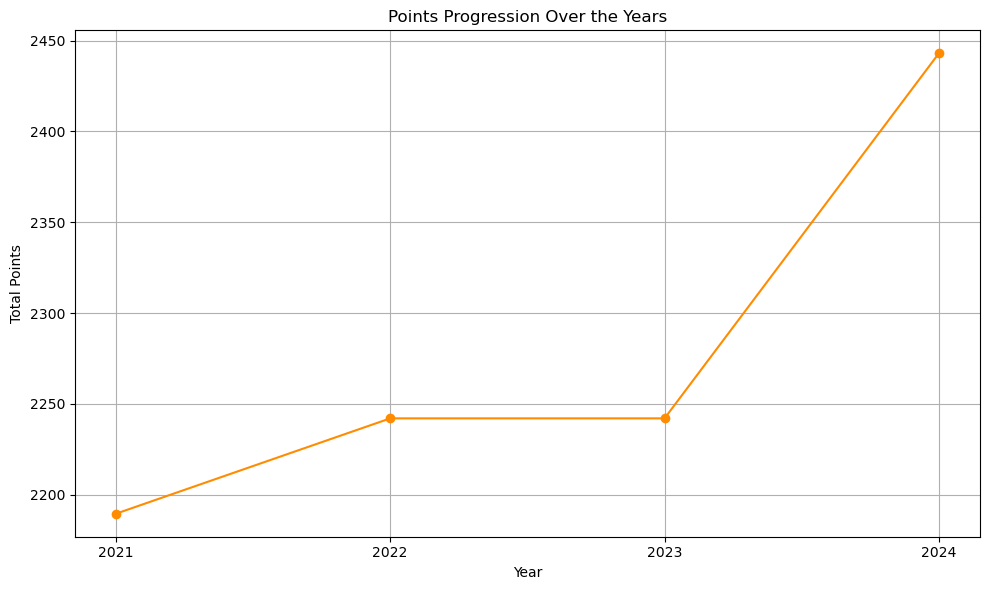

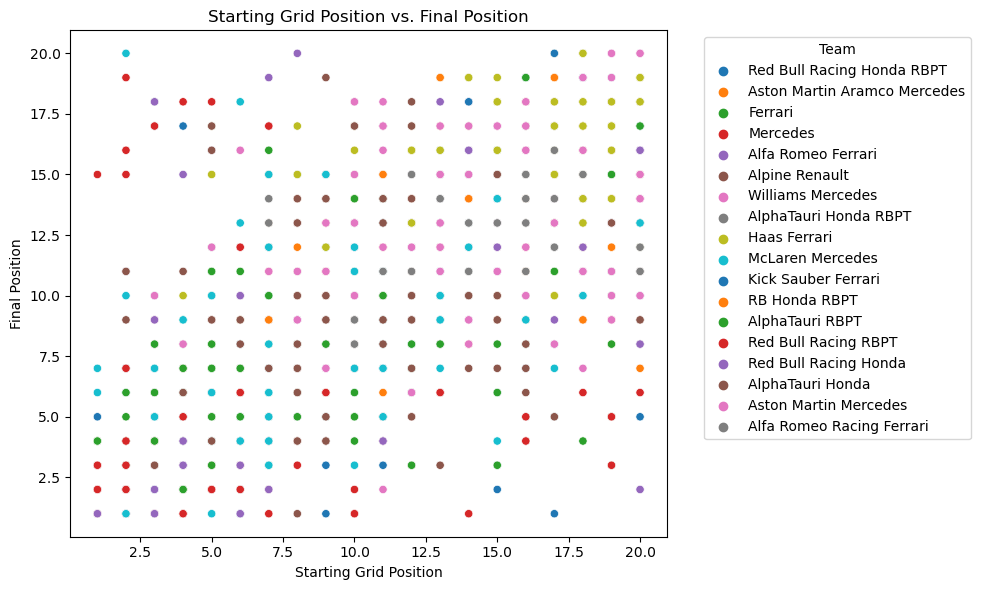

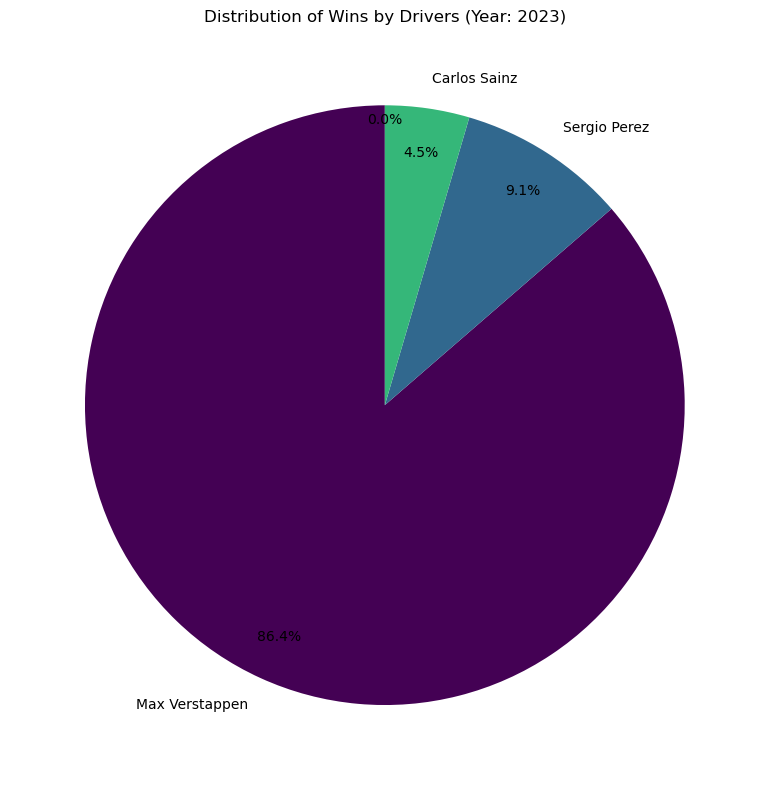

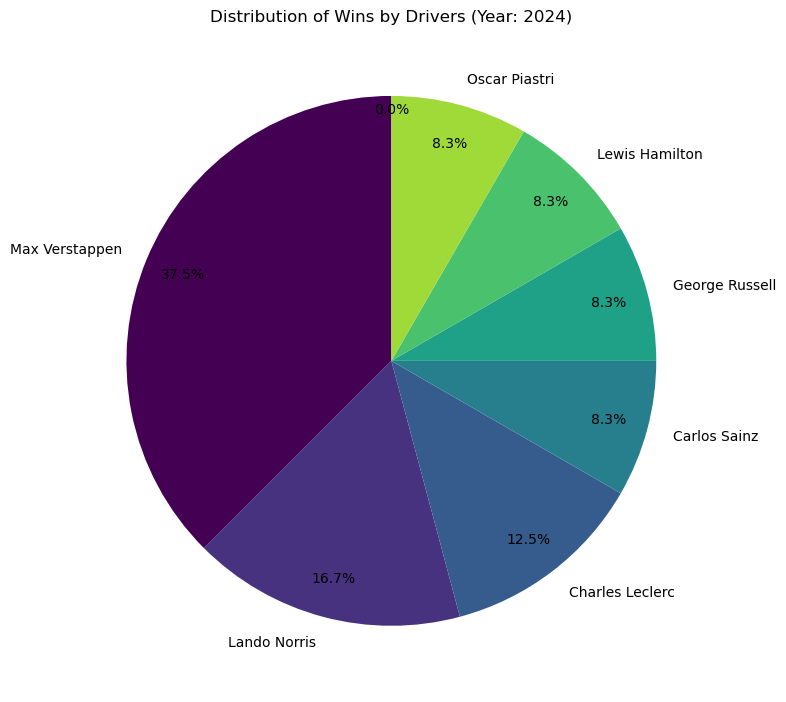

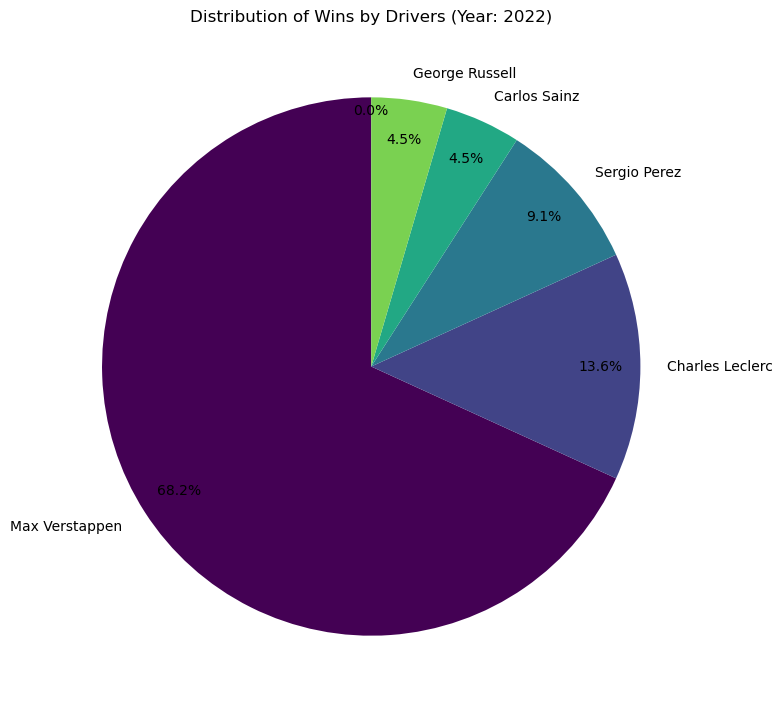

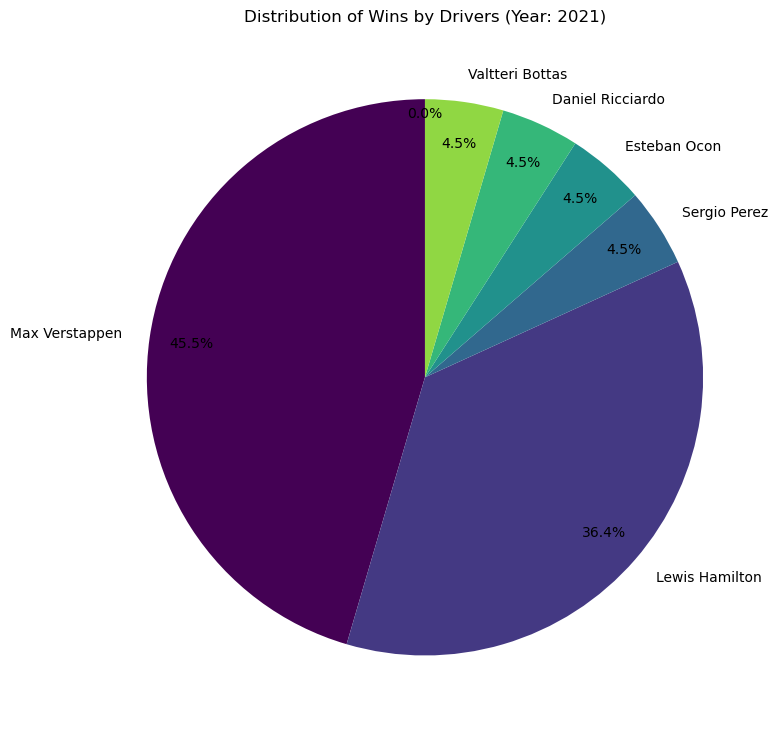

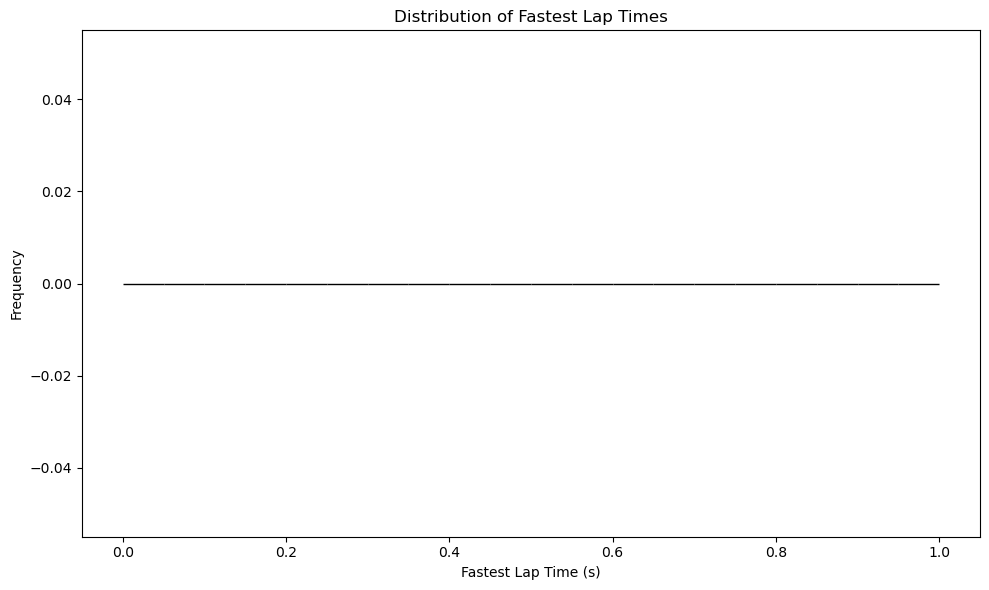

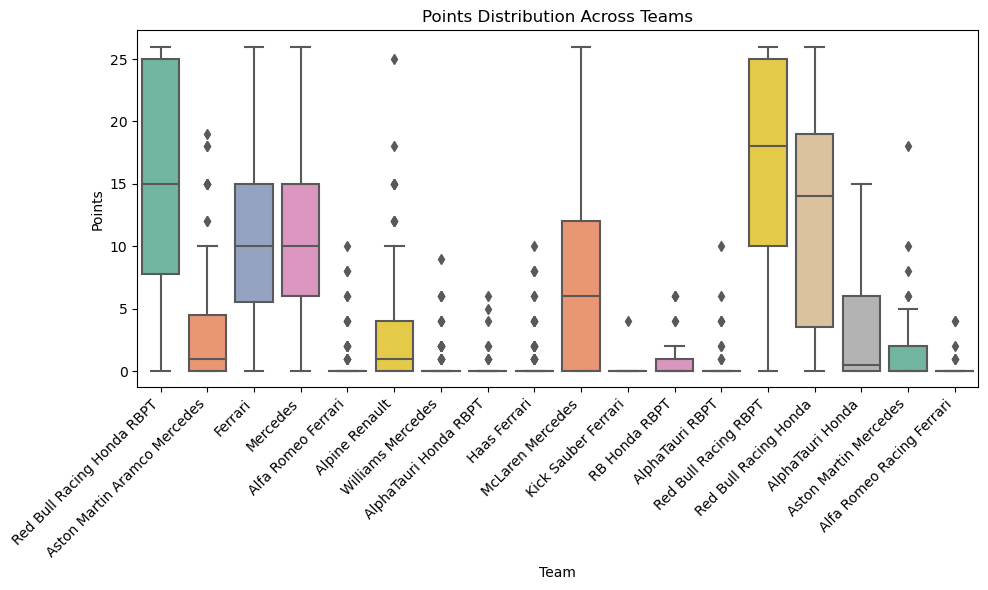

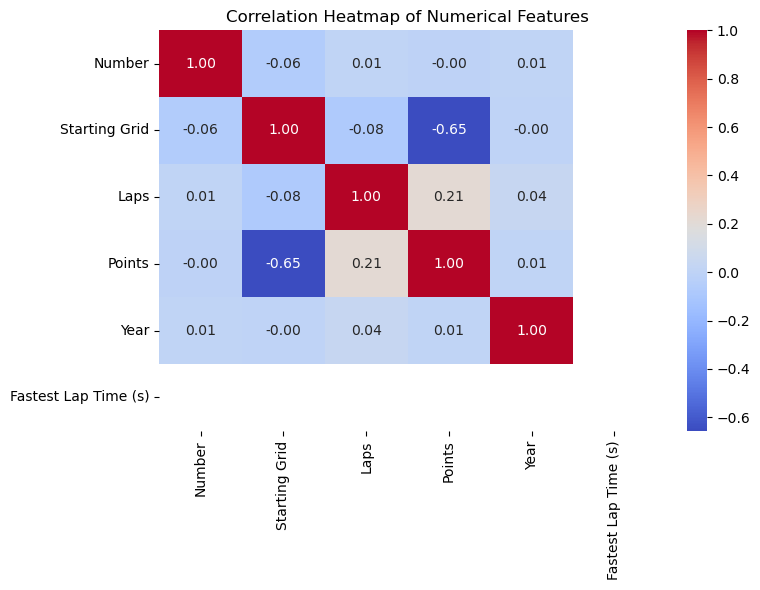

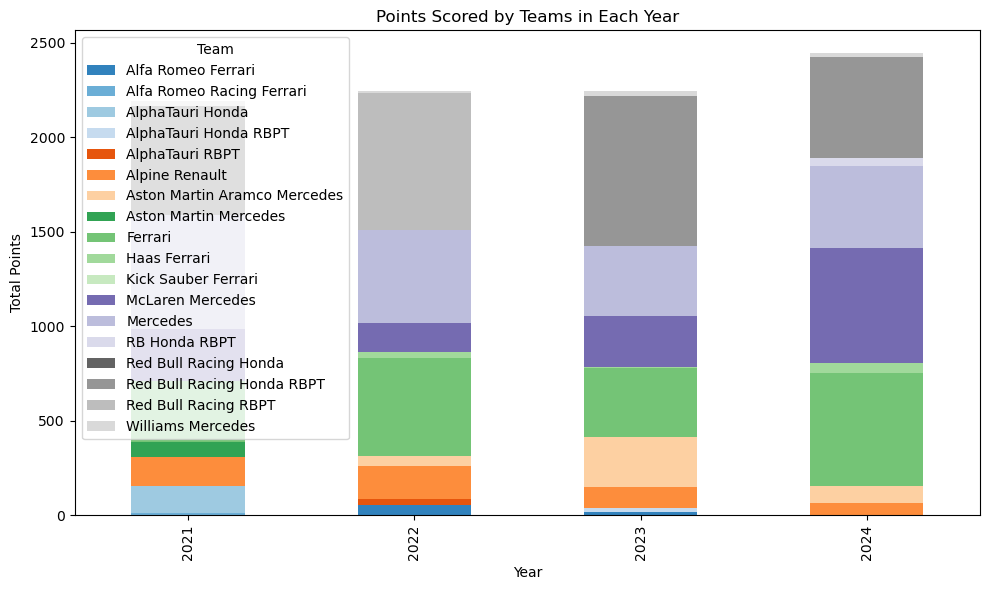

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '2021-2024_F1_Race_Results.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# 1. Bar Chart: Points scored by each team
team_points = data.groupby('Team')['Points'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
team_points.plot(kind='bar', color='steelblue')
plt.title('Total Points Scored by Each Team')
plt.ylabel('Total Points')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('team_points_bar_chart.png')
plt.show()

# 2. Line Chart: Points progression over the years
points_by_year = data.groupby('Year')['Points'].sum()
plt.figure(figsize=(10, 6))
points_by_year.plot(marker='o', color='darkorange')
plt.title('Points Progression Over the Years')
plt.ylabel('Total Points')
plt.xlabel('Year')
plt.xticks(points_by_year.index)
plt.grid(True)
plt.tight_layout()
plt.savefig('points_progression_line_chart.png')
plt.show()

# 3. Scatter Plot: Starting grid vs. final position
# Clean data for numeric values
cleaned_data = data.copy()
cleaned_data = cleaned_data[pd.to_numeric(cleaned_data['Starting Grid'], errors='coerce').notna()]
cleaned_data = cleaned_data[pd.to_numeric(cleaned_data['Position'], errors='coerce').notna()]
cleaned_data['Starting Grid'] = cleaned_data['Starting Grid'].astype(float)
cleaned_data['Position'] = cleaned_data['Position'].astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='Starting Grid', y='Position', hue='Team', palette='tab10')
plt.title('Starting Grid Position vs. Final Position')
plt.ylabel('Final Position')
plt.xlabel('Starting Grid Position')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('starting_vs_final_scatter.png')
plt.show()

# Unique years in the dataset
years = data['Year'].unique()

# Loop through each year and generate a pie chart
threshold=1
for year in years:
    # Filter data for the specific year
    yearly_data = data[data['Year'] == year]
    driver_wins_year = yearly_data[yearly_data['Position'] == 1]['Driver'].value_counts()

    # Group smaller segments into "Other Drivers"
    top_drivers = driver_wins_year[driver_wins_year >= threshold]
    others = driver_wins_year[driver_wins_year < threshold].sum()
    pie_data_year = pd.concat([top_drivers, pd.Series({'Other Drivers': others})])

    # Generate the pie chart
    plt.figure(figsize=(8, 8))
    pie_data_year.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        cmap='viridis',
        pctdistance=0.85,
        explode=[0.1 if driver == 'Other Drivers' else 0 for driver in pie_data_year.index]
    )
    plt.title(f'Distribution of Wins by Drivers (Year: {year})')
    plt.ylabel('')  # Hide the y-axis label
    plt.tight_layout()
    plt.savefig(f'driver_wins_pie_chart_{year}.png')
    plt.show()


import numpy as np

# Check if the column exists
if 'Fastest Lap Time' in data.columns:
    # Convert 'MM:SS.mmm' to seconds
    def time_to_seconds(time_str):
        try:
            minutes, seconds = map(float, time_str.split(':'))
            return minutes * 60 + seconds
        except:
            return np.nan  # Return NaN for invalid entries

    # Apply conversion
    data['Fastest Lap Time (s)'] = data['Fastest Lap Time'].apply(time_to_seconds)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data['Fastest Lap Time (s)'].dropna(), bins=20, color='dodgerblue', edgecolor='black')
    plt.title('Distribution of Fastest Lap Times')
    plt.xlabel('Fastest Lap Time (s)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('fastest_lap_histogram_fixed.png')
    plt.show()


# 6. Box Plot: Points distribution across teams
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Team', y='Points', palette='Set2')
plt.title('Points Distribution Across Teams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('points_boxplot.png')
plt.show()

# 7. Heatmap: Correlation between numerical features
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# 8. Stacked Bar Chart: Points scored by teams in each year
team_year_points = data.groupby(['Year', 'Team'])['Points'].sum().unstack()
team_year_points.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Points Scored by Teams in Each Year')
plt.ylabel('Total Points')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('stacked_bar_chart.png')
plt.show()


In [2]:
data.head()

,Track,Position,Number,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Year,Fastest Lap Time (s)
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1.0,57,01:33:56.736000,25.0,No,00:01:36.236000,2023,NaN
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2.0,57,11.987,18.0,No,00:01:36.344000,2023,NaN
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5.0,57,38.637,15.0,No,00:01:36.156000,2023,NaN
3,Bahrain,4,55,Carlos Sainz,Ferrari,4.0,57,48.052,12.0,No,00:01:37.130000,2023,NaN
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7.0,57,50.977,10.0,No,00:01:36.546000,2023,NaN


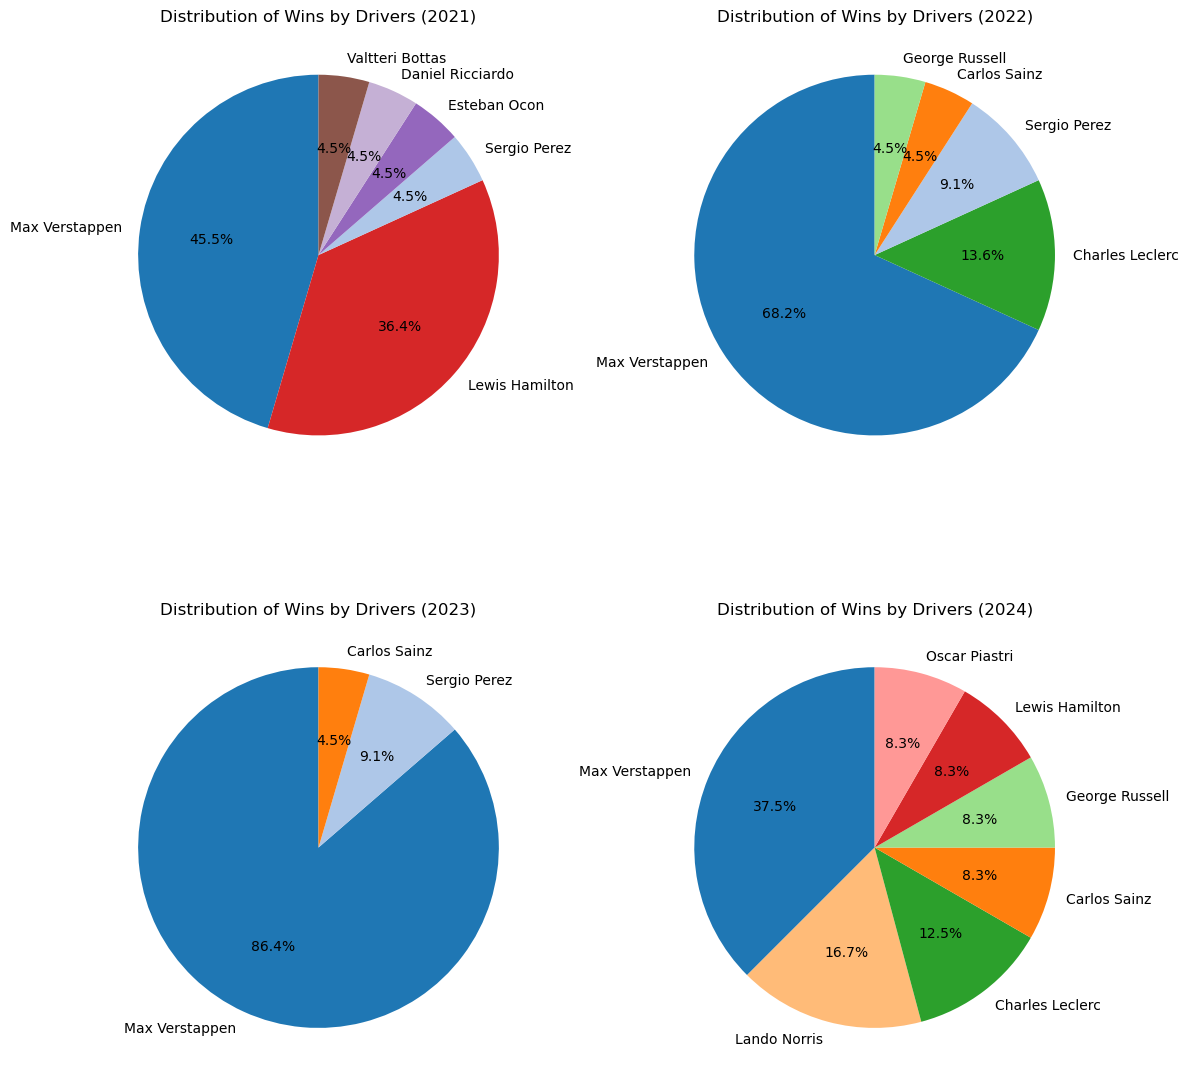

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

# Assuming 'data' is your DataFrame containing the F1 dataset

# Get the unique drivers
unique_drivers = data[data['Position'] == 1]['Driver'].unique()

# Create a color map from the tab20 color palette
colors = cm.tab20.colors  # A list of distinct colors in the tab20 palette

# Create a dictionary mapping each driver to a color
driver_color_map = {driver: colors[i % len(colors)] for i, driver in enumerate(unique_drivers)}

# Create a subplot for each year
years = [2021, 2022, 2023, 2024]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Loop through each year and plot the pie chart
for i, year in enumerate(years):
    ax = axes[i//2, i%2]
    
    # Filter data for the specific year and count wins by driver
    driver_wins = data[(data['Position'] == 1) & (data['Year'] == year)]['Driver'].value_counts()
    
    # Get the colors for the drivers in this year using the driver_color_map
    year_colors = [driver_color_map[driver] for driver in driver_wins.index]
    
    # Plot the pie chart with consistent colors for each driver
    driver_wins.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=year_colors)
    
    # Set the title and remove the y-axis label
    ax.set_title(f'Distribution of Wins by Drivers ({year})')
    ax.set_ylabel('')
    
# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('driver_wins_pie_chart_by_year_distinct_colors.png')
plt.show()


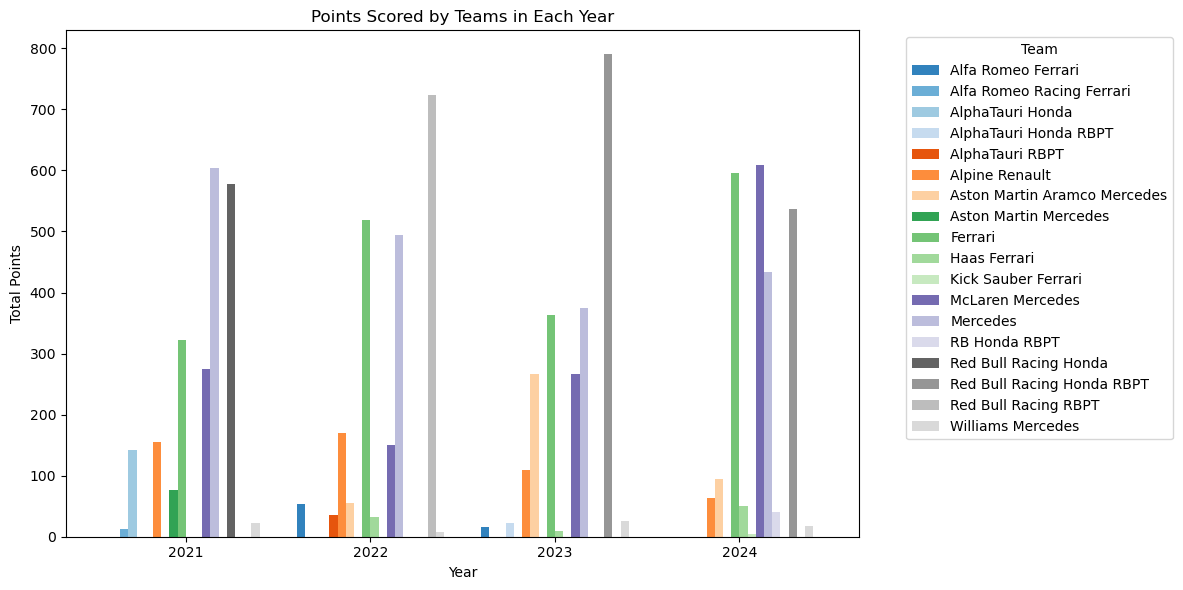

In [7]:
import matplotlib.pyplot as plt

team_year_points = data.groupby(['Year', 'Team'])['Points'].sum().unstack()

ax = team_year_points.plot(kind='bar', figsize=(12, 6), colormap='tab20c', width=0.8)

plt.title('Points Scored by Teams in Each Year')
plt.ylabel('Total Points')
plt.xlabel('Year')

ax.set_xticks(range(len(team_year_points.index)))  
ax.set_xticklabels([str(int(year)) for year in team_year_points.index], rotation=0)  

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('grouped_bar_chart_no_decimal_years.png')
plt.show()


In [8]:
# To display all the team names from the dataset, we'll first extract the unique team names from the 'Team' column.
import pandas as pd

# Assuming 'data' is your DataFrame containing the F1 dataset
team_names = data['Team'].unique()

team_names


array(['Red Bull Racing Honda RBPT', 'Aston Martin Aramco Mercedes',
       'Ferrari', 'Mercedes', 'Alfa Romeo Ferrari', 'Alpine Renault',
       'Williams Mercedes', 'AlphaTauri Honda RBPT', 'Haas Ferrari',
       'McLaren Mercedes', 'Kick Sauber Ferrari', 'RB Honda RBPT',
       'AlphaTauri RBPT', 'Red Bull Racing RBPT', 'Red Bull Racing Honda',
       'AlphaTauri Honda', 'Aston Martin Mercedes',
       'Alfa Romeo Racing Ferrari'], dtype=object)

In [6]:
# Select only numerical columns from the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

numeric_cols = numeric_data.columns
outlier_info = {}
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    outlier_info[col] = len(outliers)

# Display outlier counts for each column
print("Outlier Counts for Numerical Columns:", outlier_info)


Outlier Counts for Numerical Columns: {'Number': 22, 'Starting Grid': 0, 'Laps': 139, 'Points': 89, 'Year': 0}


In [26]:
data.isnull().sum()

Track                0
Position             0
Number               0
Driver               0
Team                 0
Starting Grid        0
Laps                 0
Time/Retired         0
Points               0
Set Fastest Lap      0
Fastest Lap Time    80
Year                 0
dtype: int64

In [25]:
condition = (data["Track"] == "Great Britain") & (data["Year"] == 2021)

# Fill null values in the "Starting Grid" column with 16 for the filtered rows
data.loc[condition, "Starting Grid"] = data.loc[condition, "Starting Grid"].fillna(16)


In [27]:
data.shape

(1799, 12)

In [17]:
cleaned_data = data.dropna(subset=['Starting Grid', 'Fastest Lap Time'])

# Option 2: Fill missing values for less critical columns
data['Fastest Lap Time (s)'] = data['Fastest Lap Time (s)'].fillna(data['Fastest Lap Time (s)'].mean())

# Save the cleaned data (optional)
cleaned_data.to_excel('cleaned_data.xlsx', index=False)

# Verify the results
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")
print("Null values after cleaning:")
print(cleaned_data.isnull().sum())

Original dataset shape: (1799, 13)
Cleaned dataset shape: (1718, 13)
Null values after cleaning:
Track                      0
Position                   0
Number                     0
Driver                     0
Team                       0
Starting Grid              0
Laps                       0
Time/Retired               0
Points                     0
Set Fastest Lap            0
Fastest Lap Time           0
Year                       0
Fastest Lap Time (s)    1718
dtype: int64


In [23]:
cleaned_data.drop(columns=['Fastest Lap Time (s)'], inplace=True)

C:\Users\aswat\AppData\Local\Temp\ipykernel_1548\3634811264.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
cleaned_data.shape

(1718, 12)

In [21]:
cleaned_data.isnull().sum()

Track                      0
Position                   0
Number                     0
Driver                     0
Team                       0
Starting Grid              0
Laps                       0
Time/Retired               0
Points                     0
Set Fastest Lap            0
Fastest Lap Time           0
Year                       0
Fastest Lap Time (s)    1718
dtype: int64

In [48]:
data = data.dropna(subset=['Starting Grid'])

In [37]:
# Descriptive Statistics
stats = numeric_data.describe()
print(stats)


            Number  Starting Grid         Laps       Points         Year  \
count  1799.000000    1798.000000  1799.000000  1799.000000  1799.000000   
mean     27.685937      10.491101    54.556976     5.067538  2022.532518   
std      23.800870       5.766045    17.472908     7.221528     1.127532   
min       1.000000       1.000000     0.000000     0.000000  2021.000000   
25%      10.000000       5.250000    51.000000     0.000000  2022.000000   
50%      20.000000      10.000000    57.000000     0.500000  2023.000000   
75%      44.000000      15.000000    69.000000     9.000000  2024.000000   
max      99.000000      20.000000    78.000000    26.000000  2024.000000   

       Fastest Lap Time (s)  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN  


In [8]:
# Handling Missing Values
data.fillna(data.median(numeric_only=True), inplace=True)

# Normalizing Numerical Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)


Missing values in each column:
Number           0
Starting Grid    1
Laps             0
Points           0
Year             0
dtype: int64
Explained Variance by PCA Components: [0.34034345 0.33545333]


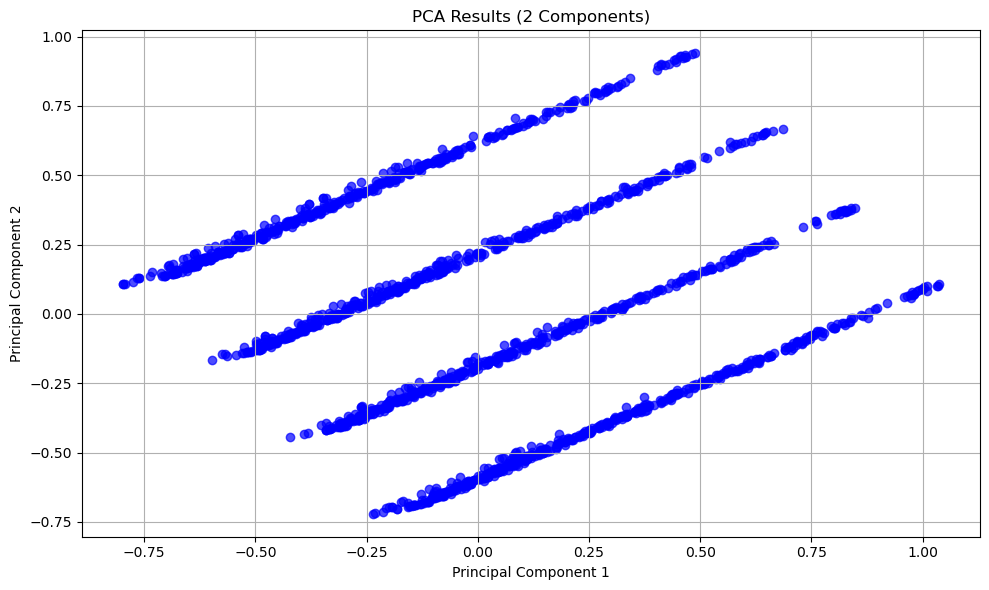

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Check for missing values
print("Missing values in each column:")
print(normalized_data.isnull().sum())

# Step 2: Handle missing values by imputing with the column mean
normalized_data = normalized_data.fillna(normalized_data.mean())

# Step 3: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
print("Explained Variance by PCA Components:", pca.explained_variance_ratio_)

# Plot PCA Results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c='blue')
plt.title('PCA Results (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_scatter_plot.png')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = normalized_data.drop(columns=['Points'], axis=1)
y = normalized_data['Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.04613139624736502


In [4]:
import pandas as pd
import plotly.express as px

# Filter data for the selected driver
driver_name = "Oscar Piastri"
driver_data = data[data["Driver"] == driver_name]

# Convert Year to string and aggregate points by year
driver_data["Year"] = driver_data["Year"].astype(str)
driver_data = driver_data.groupby("Year", as_index=False)["Points"].sum()

# Create the line chart
fig_driver = px.line(
    driver_data,
    x="Year",
    y="Points",
    title=f"{driver_name}'s Performance Over Years",
    labels={"Year": "Year", "Points": "Points"},
    markers=True
)
fig_driver.show()



C:\Users\aswat\AppData\Local\Temp\ipykernel_23624\2840860978.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
import pandas as pd
import plotly.express as px

# Filter data for the specified track
track_name = "Monaco"
track_data = data[data["Track"] == track_name]

# Debug: Check if track data exists
if track_data.empty:
    print(f"No data found for track: {track_name}")
else:
    # Aggregate points by team
    track_data = track_data.groupby("Team")["Points"].sum().reset_index()

    # Plot bar chart
    fig_team = px.bar(
        track_data,
        x="Team",
        y="Points",
        title=f"Team Dominance at {track_name}",
        labels={"Points": "Total Points", "Team": "Team"}
    )
    fig_team.show()


In [28]:
driver_performance = data.groupby(['Driver', 'Year'])['Points'].sum().reset_index()

# Interactive visualization
def plot_driver_trends(selected_drivers=None):
    if selected_drivers:
        filtered_data = driver_performance[driver_performance['Driver'].isin(selected_drivers)]
    else:
        filtered_data = driver_performance  # Show all drivers if none are selected
    
    fig = px.line(filtered_data, x="Year", y="Points", color="Driver",
                  title="2025 Driver Performance Trends Over Years",
                  markers=True,
                  labels={"Points": "Cumulative Points"})
    fig.update_layout(legend_title_text="Drivers")
    return fig

# Example usage: Visualize specific drivers
selected_drivers = ["Max Verstappen","Pierre Gasly","Oliver Bearman","Esteban Ocon","Yuki Tsunoda","George Russell", "Lewis Hamilton", "Fernando Alonso","Valtteri Bottas", "Sergio Perez","Carlos Sainz","Charles Leclerc","Oscar Piastri","Lando Norris","Daniel Ricciardo","Logan Sargeant"]
fig = plot_driver_trends(selected_drivers)
fig.show()


In [13]:
data.shape

(1799, 13)

In [14]:
data.isnull().sum()

Track                      0
Position                   0
Number                     0
Driver                     0
Team                       0
Starting Grid              1
Laps                       0
Time/Retired               0
Points                     0
Set Fastest Lap            0
Fastest Lap Time          80
Year                       0
Fastest Lap Time (s)    1799
dtype: int64